# Cho 2017 Noise EEG Recording Analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from pprint import PrettyPrinter

from Cho2017 import SubjectData

plt.rcParams['figure.figsize'] = [12, 8]
pprint = PrettyPrinter().pprint

In [2]:
subject = SubjectData('Cho2017-Data/s01.mat')
pprint(subject.raw_noise)

{'blinking': <RawArray | 68 x 5120 (10.0 s), ~2.8 MB, data loaded>,
 'eye_left-right': <RawArray | 68 x 5120 (10.0 s), ~2.8 MB, data loaded>,
 'eye_up-down': <RawArray | 68 x 5120 (10.0 s), ~2.8 MB, data loaded>,
 'head_left-right': <RawArray | 68 x 5120 (10.0 s), ~2.8 MB, data loaded>,
 'jaw': <RawArray | 68 x 5120 (10.0 s), ~2.8 MB, data loaded>}


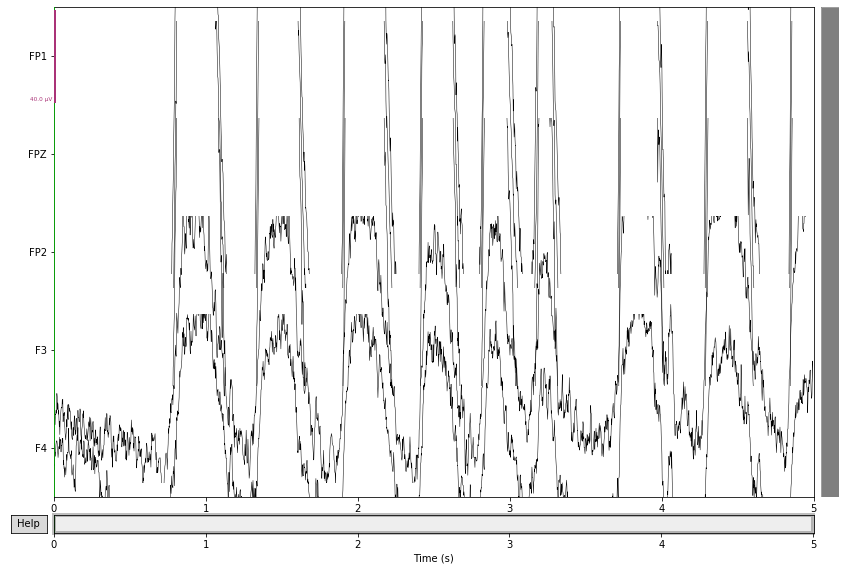

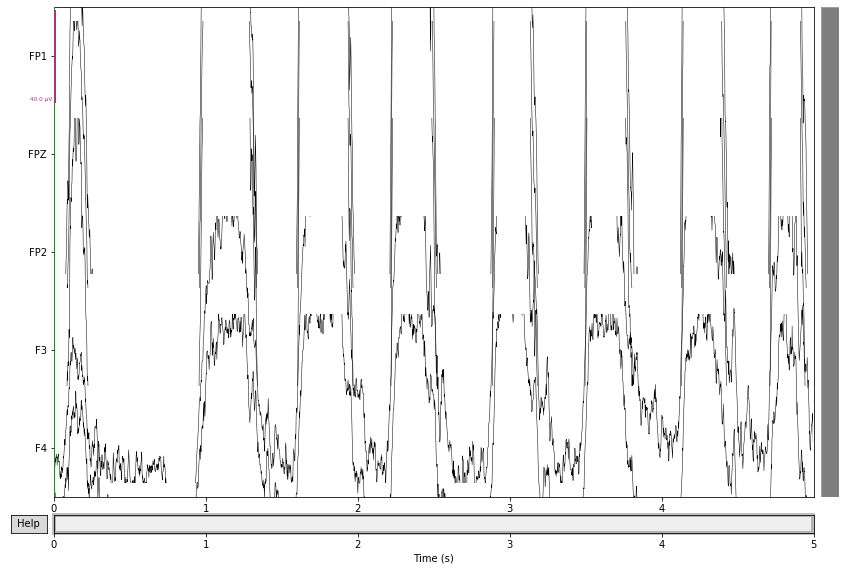

In [25]:
picks = ['FP1', 'FPZ', 'FP2', 'F3', 'F4'] # None / ['eeg'] for first 20 channels or list of channel names for those specified channels
blinking = [subject.raw_noise['blinking'].copy().crop(tmin=0, tmax=5), subject.raw_noise['blinking'].copy().crop(tmin=5, tmax=None)]
blinking[0].copy().pick(picks).plot();
blinking[1].copy().pick(picks).plot();

Using channel FP1 as EOG channel
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected : 9
Not setting metadata
Not setting metadata
9 matching events found
No baseline correction applied
Loading data for 9 events and 513 original time points ...
1 bad epochs dropped
Using channel FP1 as EOG channel
EOG channel index for this sub

<ipython-input-28-7d4a6258c0c3>:2: RuntimeWarning: filter_length (8192) is longer than the signal (2561), distortion is likely. Reduce filter length or filter a longer signal.
  blink_epochs = [create_eog_epochs(blinking[0], ch_name='FP1'), create_eog_epochs(blinking[1], ch_name='FP1')]
<ipython-input-28-7d4a6258c0c3>:2: RuntimeWarning: filter_length (8192) is longer than the signal (2561), distortion is likely. Reduce filter length or filter a longer signal.
  blink_epochs = [create_eog_epochs(blinking[0], ch_name='FP1'), create_eog_epochs(blinking[1], ch_name='FP1')]
<ipython-input-28-7d4a6258c0c3>:2: RuntimeWarning: filter_length (8192) is longer than the signal (2560), distortion is likely. Reduce filter length or filter a longer signal.
  blink_epochs = [create_eog_epochs(blinking[0], ch_name='FP1'), create_eog_epochs(blinking[1], ch_name='FP1')]
<ipython-input-28-7d4a6258c0c3>:2: RuntimeWarning: filter_length (8192) is longer than the signal (2560), distortion is likely. Reduce f

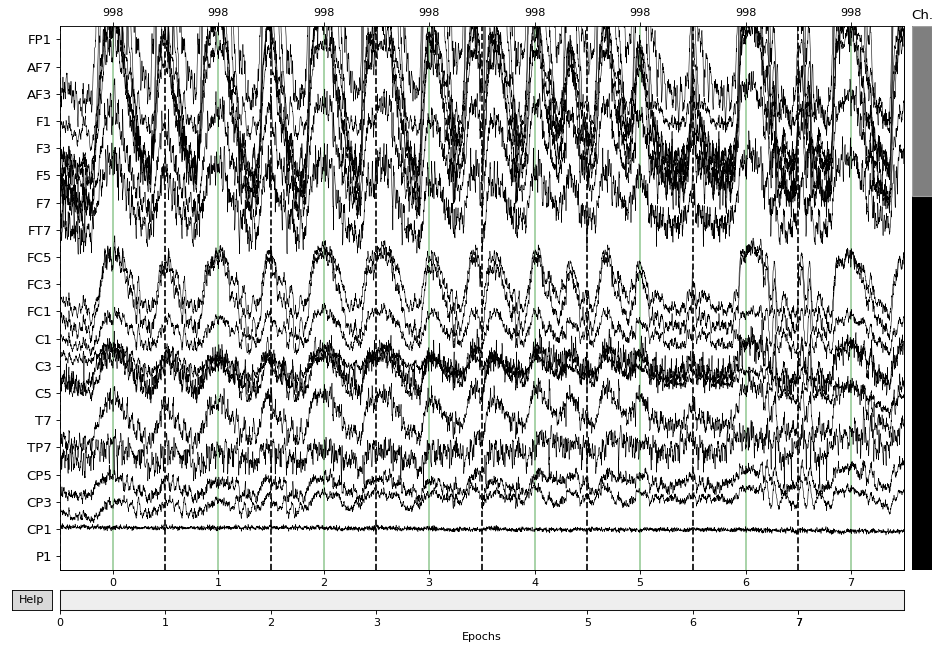

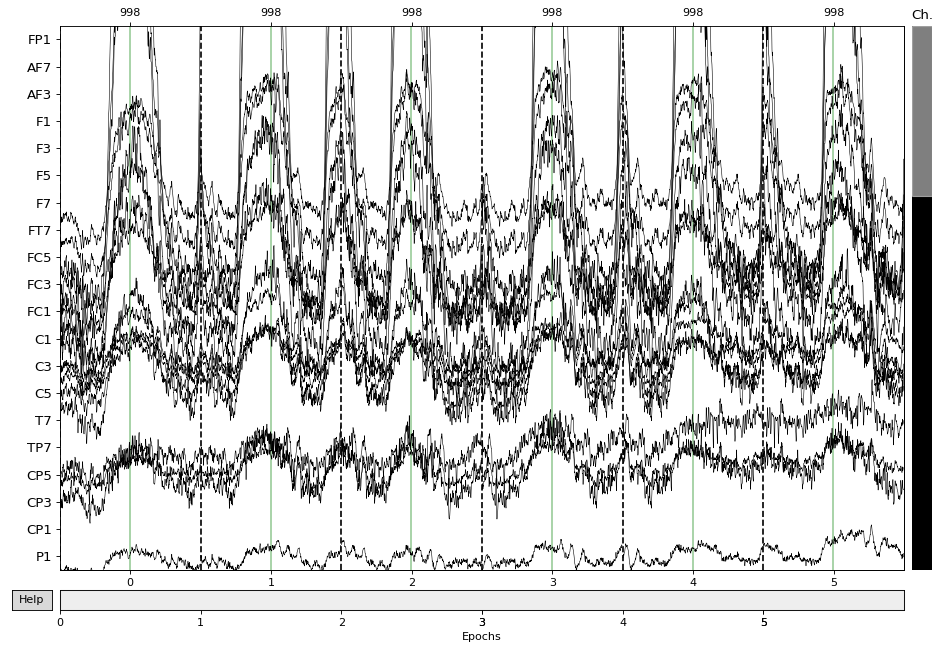

In [28]:
from mne.preprocessing import create_eog_epochs
blink_epochs = [create_eog_epochs(blinking[0], ch_name='FP1'), create_eog_epochs(blinking[1], ch_name='FP1')]
blink_epochs[0].plot();
blink_epochs[1].plot();